In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_laptop_prices_v01.csv')
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [4]:
df.isna().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

In [5]:
df.shape

(4446, 14)

In [21]:
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"1,144.48"


In [26]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

In [27]:

df['price'] = pd.to_numeric(df['price'])
df['price']

0        589.99
1        999.99
2       1599.00
3        689.99
4       1144.48
         ...   
4441    1699.00
4442     589.99
4443     591.99
4444    1771.99
4445     938.99
Name: price, Length: 4446, dtype: float64

# top 10 brands

In [32]:
data_c = df['brand'].value_counts().head(10).reset_index()
data_c

,brand,count
0,Dell,1581
1,HP,804
2,ROKC,637
3,MSI,473
4,Lenovo,308
5,ASUS,160
6,DELL,147
7,acer,108
8,LG,39
9,Apple,29


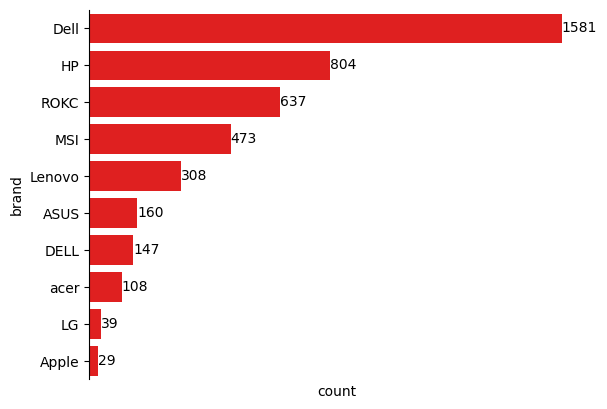

In [38]:
ax = sns.barplot(data_c, x='count', y= 'brand',color='r')
sns.despine(bottom=True)
ax.bar_label(ax.containers[0])
plt.xticks([],[]);

# Least Expensive Brands

In [41]:
data_p = df.groupby('brand')['price'].mean().sort_values(ascending=True).head(10).reset_index()
data_p

,brand,price
0,Carlisle FoodService Products,134.900000
1,Gateway,162.495000
2,Latitude,178.183333
3,TOPOSH,179.000000
4,Quality Refurbished Computers,190.940000
5,ONN,203.000000
6,IVIEW,214.970000
7,Goldengulf,218.860000
8,Tocosy,229.000000
9,AWOW,308.420000


Text(0.5, 1.0, 'Least Expensive Brands')

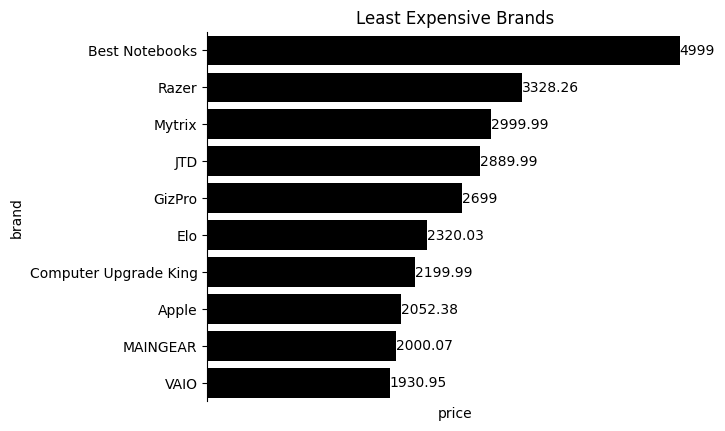

In [50]:
ax = sns.barplot(data_p, x= 'price', y='brand', color='black')
sns.despine(bottom=True)
ax.bar_label(ax.containers[0])
plt.xticks([],[]);
plt.title('Least Expensive Brands')

# Most Expensive Brands

In [46]:
data_g = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10).reset_index()
data_g

,brand,price
0,Best Notebooks,4999.000000
1,Razer,3328.258333
2,Mytrix,2999.990000
3,JTD,2889.990000
4,GizPro,2699.000000
5,Elo,2320.030000
6,Computer Upgrade King,2199.990000
7,Apple,2052.377586
8,MAINGEAR,2000.070000
9,VAIO,1930.950000


Text(0.5, 1.0, 'Least Expensive Brands')

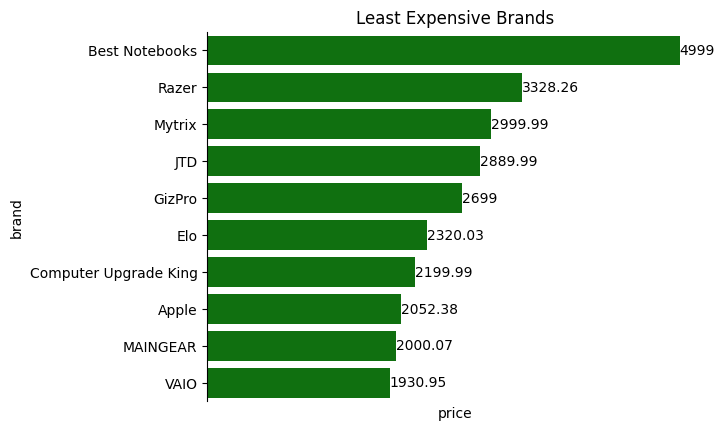

In [49]:
ax = sns.barplot(data_g, x= 'price', y='brand', color='g')
sns.despine(bottom=True)
ax.bar_label(ax.containers[0])
plt.xticks([],[]);
plt.title('Most Expensive Brands')